# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [ ]:
# Install the required libraries
!pip install Prophet


In [ ]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates




## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [ ]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-62-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [ ]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


                     Search Trends
Date                              
2020-05-01 00:00:00             80
2020-05-01 01:00:00             80
2020-05-01 02:00:00             76
2020-05-01 03:00:00             66
2020-05-01 04:00:00             53
...                            ...
2020-05-31 19:00:00             59
2020-05-31 20:00:00             64
2020-05-31 21:00:00             76
2020-05-31 22:00:00             90
2020-05-31 23:00:00             96

[744 rows x 1 columns]


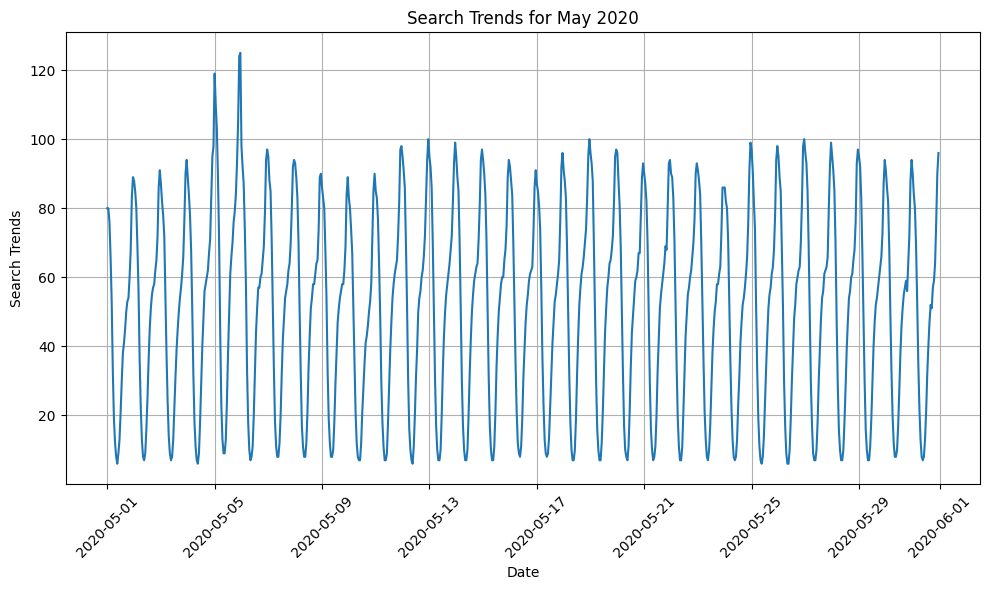

In [ ]:
# Slice the DataFrame to just the month of May 2020
may_2020_df = df_mercado_trends.loc['2020-05']

print(may_2020_df)

# Plot to visualize the data for May 2020
plt.figure(figsize=(10, 6))
plt.plot(may_2020_df.index, may_2020_df['Search Trends'], linestyle='-')
plt.title('Search Trends for May 2020')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [ ]:
# Calculate the sum of the total search traffic for May 2020
total_search_traffic = may_2020_df['Search Trends'].sum()

# View the traffic_may_2020 value
print(f'Total search traffic for May 2020: {total_search_traffic}')

Total search traffic for May 2020: 38181


In [ ]:
# Calcluate the monhtly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions

df_mercado_trends['YearMonth'] = df_mercado_trends.index.to_period('M')

# Group by the month and year, then calculate the median search traffic for each month
monthly_median = df_mercado_trends.groupby('YearMonth')['Search Trends'].median()

# Chain the sum and median functions to get the desired result
monthly_grouped_sum_median = df_mercado_trends.groupby('YearMonth')['Search Trends'].sum().median()

# View the median_monthly_traffic value
print("Monthly Median Search Traffic:")
print(monthly_median)
print("\nMedian of Monthly Sum of Search Traffic:")
print(monthly_grouped_sum_median)


# Filter the DataFrame for May 2020 and calculate its median search traffic
may_2020_median = may_2020_df['Search Trends'].median()

# Calculate the overall monthly median search traffic
overall_monthly_median = df_mercado_trends.groupby('YearMonth')['Search Trends'].median().median()


Monthly Median Search Traffic:
YearMonth
2016-06    50.0
2016-07    48.5
2016-08    50.0
2016-09    47.0
2016-10    45.0
2016-11    51.0
2016-12    48.0
2017-01    47.0
2017-02    51.0
2017-03    51.0
2017-04    47.0
2017-05    47.0
2017-06    50.5
2017-07    49.0
2017-08    51.0
2017-09    49.0
2017-10    44.0
2017-11    51.0
2017-12    50.0
2018-01    54.0
2018-02    53.0
2018-03    51.0
2018-04    52.0
2018-05    49.0
2018-06    49.0
2018-07    51.5
2018-08    54.0
2018-09    51.0
2018-10    52.0
2018-11    50.0
2018-12    51.0
2019-01    57.0
2019-02    56.0
2019-03    54.0
2019-04    54.0
2019-05    50.0
2019-06    55.0
2019-07    55.0
2019-08    55.5
2019-09    53.0
2019-10    55.0
2019-11    54.5
2019-12    54.0
2020-01    57.0
2020-02    56.0
2020-03    52.0
2020-04    53.0
2020-05    54.0
2020-06    53.0
2020-07    50.0
2020-08    48.0
2020-09    49.0
Freq: M, Name: Search Trends, dtype: float64

Median of Monthly Sum of Search Traffic:
35172.5


In [ ]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
# traffic_may_2020/median_monthly_traffic

comparison = may_2020_median / overall_monthly_median

# Display the results
print("Median Search Traffic for May 2020:", may_2020_median)
print("Overall Monthly Median Search Traffic:", overall_monthly_median)
print("Comparison (May 2020 / Overall Monthly Median):", comparison)

Median Search Traffic for May 2020: 54.0
Overall Monthly Median Search Traffic: 51.0
Comparison (May 2020 / Overall Monthly Median): 1.0588235294117647


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:**  Yes, as the median search traffic in May 2020 has increased agains all the months.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

In [ ]:
# Load the CSV file
url = "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv"
data = pd.read_csv(url)

# Display the columns
print("Columns in the dataset:")
print(data.columns)

data.head()


Columns in the dataset:
Index(['Date', 'Search Trends'], dtype='object')


,Date,Search Trends
0,6/1/16 0:00,97
1,6/1/16 1:00,92
2,6/1/16 2:00,76
3,6/1/16 3:00,60
4,6/1/16 4:00,38


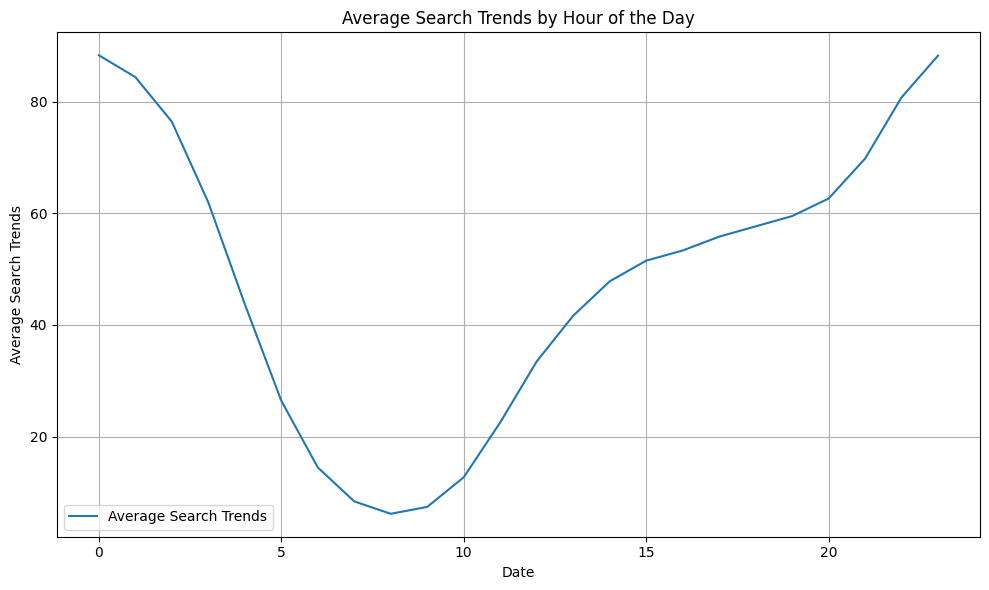

In [ ]:
#Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`

# Ensure the DataFrame has a datetime index
# df_mercado_trends['date'] = pd.to_datetime(df_mercado_trends['date'])
# df_mercado_trends.set_index('date', inplace=True)

# Add a column for the hour of the day
df_mercado_trends['hour'] = df_mercado_trends.index.hour

# Group by 'hour' and calculate the mean of 'Search Trends'
hourly_avg_traffic = df_mercado_trends.groupby('hour')['Search Trends'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_traffic.index, hourly_avg_traffic.values, linestyle='-', label='Average Search Trends')
plt.xlabel('Date')
plt.ylabel('Average Search Trends')
plt.title('Average Search Trends by Hour of the Day')
plt.grid(True)
plt.xticks(range(0, 24, 5))  # Setting x-ticks at intervals of 5
plt.legend()
plt.tight_layout()
plt.show()





#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

In [ ]:
print(df_mercado_trends.columns)

Index(['Search Trends', 'YearMonth', 'hour'], dtype='object')


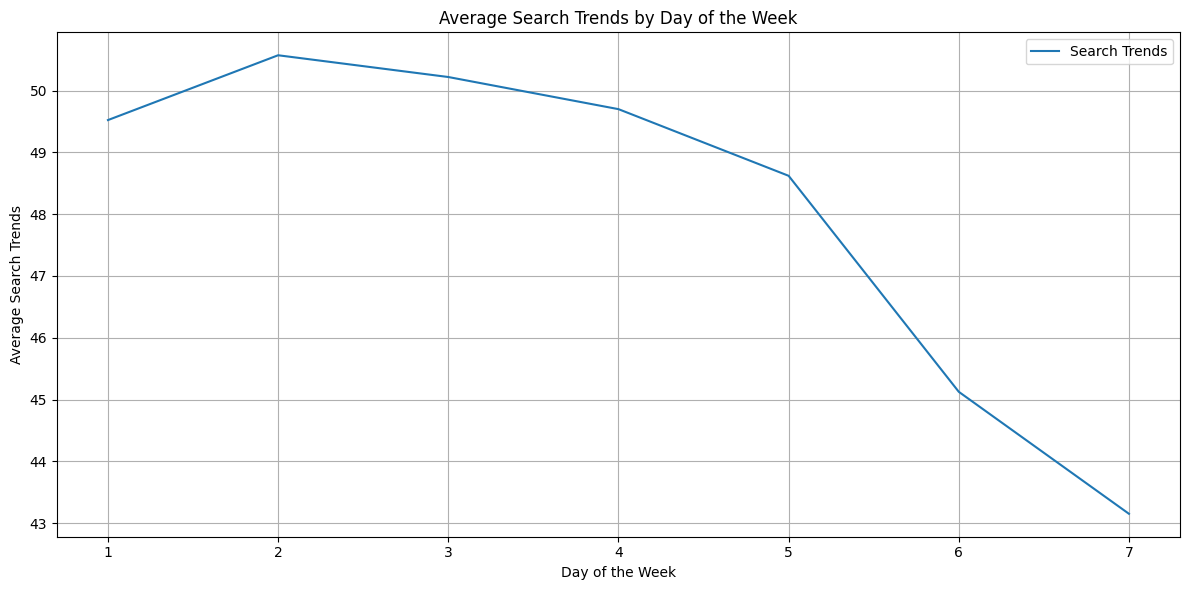

In [ ]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.

# Add columns for hour and day of the week
df_mercado_trends['hour'] = df_mercado_trends.index.hour
df_mercado_trends['day_of_week'] = df_mercado_trends.index.isocalendar().day

# Group by 'day_of_week' and calculate the mean of 'Search Trends'
daily_avg_traffic = df_mercado_trends.groupby('day_of_week')['Search Trends'].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_traffic.index, daily_avg_traffic.values, linestyle='-', label='Search Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Average Search Trends')
plt.title('Average Search Trends by Day of the Week')
plt.grid(True)
plt.xticks(range(1, 8))
plt.legend()
plt.tight_layout()
plt.show()



#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

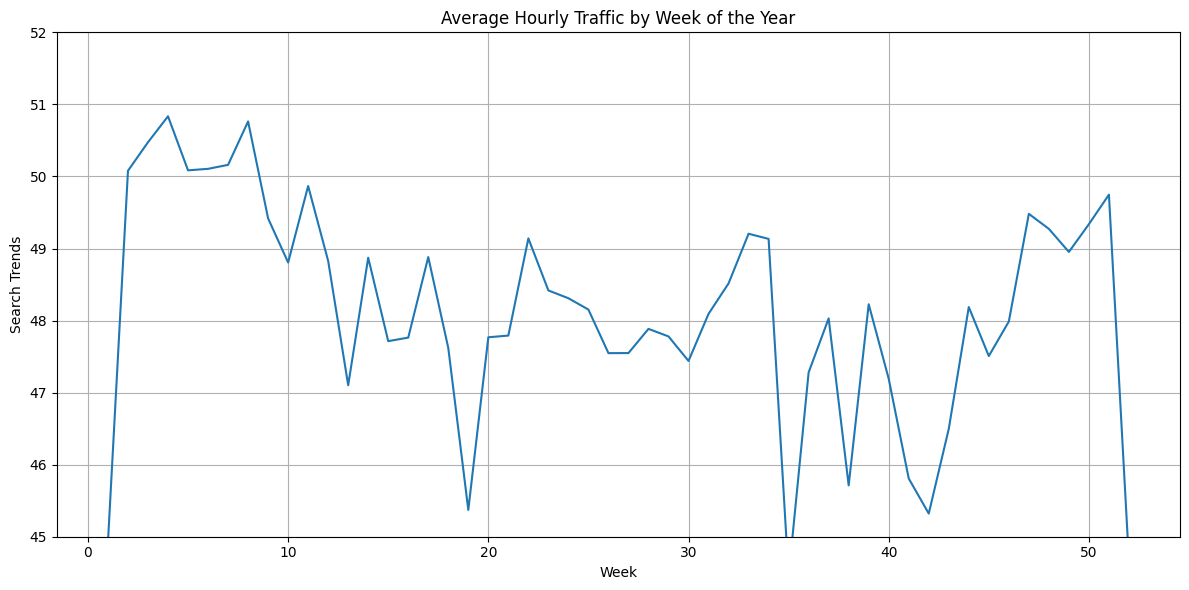

In [ ]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.

# Group by week of the year and calculate the mean
df_mercado_trends['week'] = df_mercado_trends.index.isocalendar().week
avg_traffic = df_mercado_trends.groupby('week')['Search Trends'].mean()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Plot average traffic
avg_traffic.plot(ax=ax)

# Set x-axis ticks at intervals of 10 weeks
xticks = range(0, max(avg_traffic.index) + 1, 10)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

# Set y-axis limits
ax.set_ylim(45, 52)

# Labels and title
ax.set_xlabel('Week')
ax.set_ylabel('Search Trends')
ax.set_title('Average Hourly Traffic by Week of the Year')

plt.grid(True)
plt.tight_layout()
plt.show()






The search trend volume seemed to decline every 15 weeks.  The searcht trend traffic peaked at the in the beginning and end of the year.

**Question:** Are there any time based trends that you can see in the data?

**Answer:**The search trend volume seemed to decline every 15 weeks. The searcht trend traffic peaked at the in the beginning and end of the year.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [ ]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


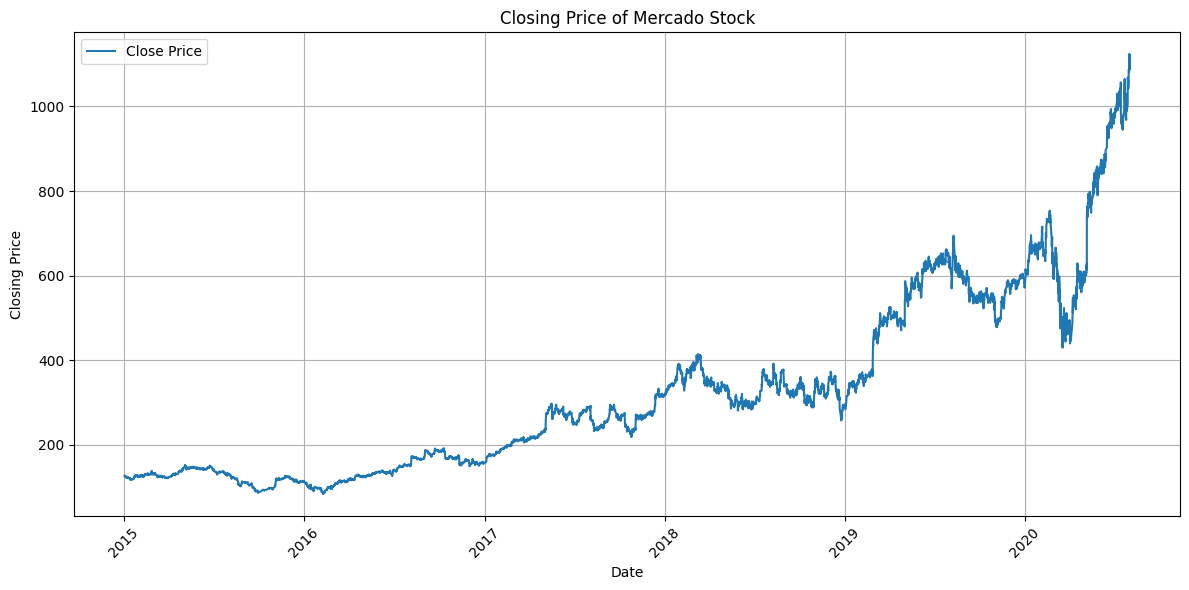

In [ ]:
# Visualize the closing price of the df_mercado_stock DataFrame

# Plotting the closing price
plt.figure(figsize=(12, 6))
plt.plot(df_mercado_stock.index, df_mercado_stock['close'], label='Close Price')

# Adding titles and labels
plt.title('Closing Price of Mercado Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Rotate the x-axis labels
plt.xticks(rotation=45)

plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data

mercado_stock_trends_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna(how='any')


# View the first and last five rows of the DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())


,close,Search Trends,YearMonth,hour,day_of_week,week
2016-06-01 09:00:00,135.16,6.0,2016-06,9.0,3,22
2016-06-01 10:00:00,136.63,12.0,2016-06,10.0,3,22
2016-06-01 11:00:00,136.56,22.0,2016-06,11.0,3,22
2016-06-01 12:00:00,136.42,33.0,2016-06,12.0,3,22
2016-06-01 13:00:00,136.10,40.0,2016-06,13.0,3,22


,close,Search Trends,YearMonth,hour,day_of_week,week
2020-07-31 11:00:00,1105.780,20.0,2020-07,11.0,5,31
2020-07-31 12:00:00,1087.925,32.0,2020-07,12.0,5,31
2020-07-31 13:00:00,1095.800,41.0,2020-07,13.0,5,31
2020-07-31 14:00:00,1110.650,47.0,2020-07,14.0,5,31
2020-07-31 15:00:00,1122.510,53.0,2020-07,15.0,5,31


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [ ]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
# Slicing the first six months of 2020 from df_combined
mercado_stock_trends_df =  mercado_stock_trends_df.loc['2020-01-01':'2020-06-30']


# View the first and last five rows of first_half_2020 DataFrame
display(mercado_stock_trends_df)

,close,Search Trends,YearMonth,hour,day_of_week,week
2020-01-02 09:00:00,601.085,9.0,2020-01,9.0,4,1
2020-01-02 10:00:00,601.290,14.0,2020-01,10.0,4,1
2020-01-02 11:00:00,615.410,25.0,2020-01,11.0,4,1
2020-01-02 12:00:00,611.400,37.0,2020-01,12.0,4,1
2020-01-02 13:00:00,611.830,50.0,2020-01,13.0,4,1
...,...,...,...,...,...,...
2020-06-30 11:00:00,976.170,17.0,2020-06,11.0,2,27
2020-06-30 12:00:00,977.500,27.0,2020-06,12.0,2,27
2020-06-30 13:00:00,973.230,37.0,2020-06,13.0,2,27
2020-06-30 14:00:00,976.500,45.0,2020-06,14.0,2,27


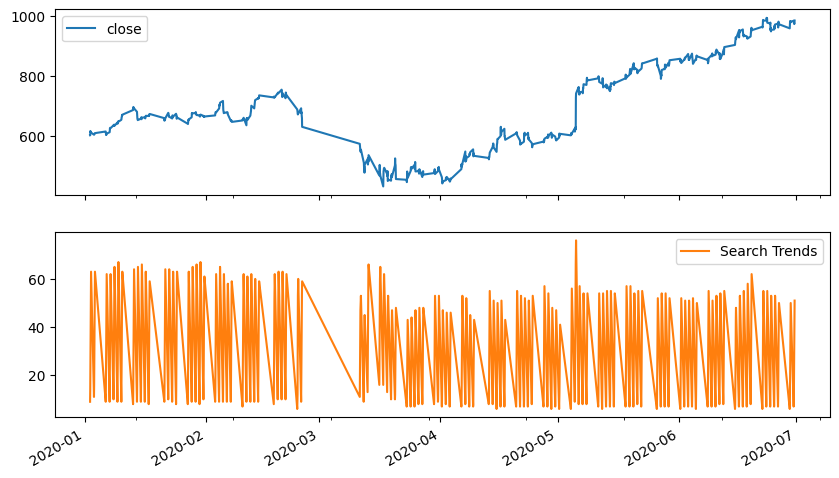

In [ ]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`

mercado_stock_trends_df[['close', 'Search Trends']].plot(subplots=True, figsize=(10, 6))
plt.show()


##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:**No, first chart seems more consistest as Covid hit stocks went down drastically. The second one just show that just went up down consistently until March 2020, and then dropped off right before April,2020 and then just went up down consistenly until the end of June, 2020.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour

mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df['Search Trends'].shift(1)

# Print the first few rows to inspect the new column
print(mercado_stock_trends_df.head())

# Check the data types to ensure they are consistent
print(mercado_stock_trends_df.dtypes)


                       close  Search Trends YearMonth  hour  day_of_week  \
2020-01-02 09:00:00  601.085            9.0   2020-01   9.0            4   
2020-01-02 10:00:00  601.290           14.0   2020-01  10.0            4   
2020-01-02 11:00:00  615.410           25.0   2020-01  11.0            4   
2020-01-02 12:00:00  611.400           37.0   2020-01  12.0            4   
2020-01-02 13:00:00  611.830           50.0   2020-01  13.0            4   

                     week  Lagged Search Trends  
2020-01-02 09:00:00     1                   NaN  
2020-01-02 10:00:00     1                   9.0  
2020-01-02 11:00:00     1                  14.0  
2020-01-02 12:00:00     1                  25.0  
2020-01-02 13:00:00     1                  37.0  
close                     float64
Search Trends             float64
YearMonth               period[M]
hour                      float64
day_of_week                UInt32
week                       UInt32
Lagged Search Trends      float64
dtype

In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window

# Assuming mercado_stock_trends_df is your DataFrame with a datetime index
# or you have a 'date' column that can be used to filter
mercado_stock_trends_df = mercado_stock_trends_df.loc['2020-01-01':'2020-06-30']

# Calculate the rolling standard deviation over a 4-period window
mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df['close'].rolling(window=4).std()

# Assign the calculated 'Stock Volatility' back to the main DataFrame
mercado_stock_trends_df.loc[mercado_stock_trends_df.index, 'Stock Volatility'] = mercado_stock_trends_df['Stock Volatility']





<ipython-input-79-d9c7ddd3e473>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df['close'].rolling(window=4).std()


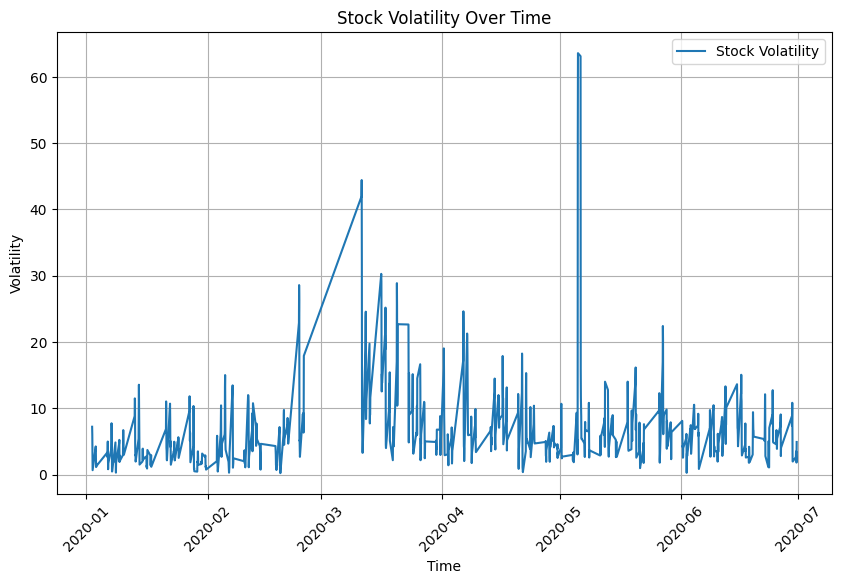

In [ ]:
# Visualize the stock volatility

plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(mercado_stock_trends_df.index, mercado_stock_trends_df['Stock Volatility'], label='Stock Volatility')
plt.title('Stock Volatility Over Time')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()




**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price

# Assuming mercado_stock_trends_df is your DataFrame
# Calculate the hourly return percentage
mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df['close'].pct_change() * 100


<ipython-input-81-7ea38cd71961>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df['close'].pct_change() * 100


In [ ]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame

print(mercado_stock_trends_df.head())

print(mercado_stock_trends_df.tail())


                       close  Search Trends YearMonth  hour  day_of_week  \
2020-01-02 09:00:00  601.085            9.0   2020-01   9.0            4   
2020-01-02 10:00:00  601.290           14.0   2020-01  10.0            4   
2020-01-02 11:00:00  615.410           25.0   2020-01  11.0            4   
2020-01-02 12:00:00  611.400           37.0   2020-01  12.0            4   
2020-01-02 13:00:00  611.830           50.0   2020-01  13.0            4   

                     week  Lagged Search Trends  Stock Volatility  \
2020-01-02 09:00:00     1                   NaN               NaN   
2020-01-02 10:00:00     1                   9.0               NaN   
2020-01-02 11:00:00     1                  14.0               NaN   
2020-01-02 12:00:00     1                  25.0          7.241739   
2020-01-02 13:00:00     1                  37.0          6.067396   

                     Hourly Stock Return  
2020-01-02 09:00:00                  NaN  
2020-01-02 10:00:00             0.034105  

#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [ ]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
mercado_stock_trends_df[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.105609,0.034082
Lagged Search Trends,-0.105609,1.000000,-0.003399
Hourly Stock Return,0.034082,-0.003399,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:**No as there is little to no correlateing between the Stock volatility, lagged search trends, and hourly stock return.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [ ]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df.rename(columns={'Date': 'ds', 'Search Trends': 'y'}, inplace=True)

# Drop an NaN values from the prophet_df DataFrame
prophet_df = prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
print(prophet_df.head())
print(prophet_df.tail())



                   ds   y YearMonth  hour  day_of_week  week
0 2016-06-01 00:00:00  97   2016-06     0            3    22
1 2016-06-01 01:00:00  92   2016-06     1            3    22
2 2016-06-01 02:00:00  76   2016-06     2            3    22
3 2016-06-01 03:00:00  60   2016-06     3            3    22
4 2016-06-01 04:00:00  38   2016-06     4            3    22
                       ds   y YearMonth  hour  day_of_week  week
37101 2020-09-07 20:00:00  71   2020-09    20            1    37
37102 2020-09-07 21:00:00  83   2020-09    21            1    37
37103 2020-09-07 22:00:00  96   2020-09    22            1    37
37104 2020-09-07 23:00:00  97   2020-09    23            1    37
37105 2020-09-08 00:00:00  96   2020-09     0            2    37


In [ ]:
# Call the Prophet function, store as an object
model = Prophet()

In [ ]:
# Fit the time-series model.
model.fit(prophet_df)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpuq6qlfdw/hl10e41i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuq6qlfdw/mv0kn_6a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93641', 'data', 'file=/tmp/tmpuq6qlfdw/hl10e41i.json', 'init=/tmp/tmpuq6qlfdw/mv0kn_6a.json', 'output', 'file=/tmp/tmpuq6qlfdw/prophet_model4vj1mpml/prophet_model-20240715144050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:41:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a future dataframe to hold predictions
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')

# Make the prediction go out as far as 2000 hours (approx 80 days)
forecast_mercado_trends = model.predict(future_mercado_trends)

# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail()

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [ ]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model.predict(future_mercado_trends)
# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.469500,81.424322,97.931499,44.469500,44.469500,45.159722,45.159722,45.159722,41.452703,...,1.860594,1.860594,1.860594,1.846426,1.846426,1.846426,0.0,0.0,0.0,89.629222
1,2016-06-01 01:00:00,44.470406,77.678510,94.499807,44.470406,44.470406,41.605529,41.605529,41.605529,37.943556,...,1.810498,1.810498,1.810498,1.851474,1.851474,1.851474,0.0,0.0,0.0,86.075935
2,2016-06-01 02:00:00,44.471312,66.818698,84.523000,44.471312,44.471312,31.282049,31.282049,31.282049,27.656646,...,1.768912,1.768912,1.768912,1.856491,1.856491,1.856491,0.0,0.0,0.0,75.753361
3,2016-06-01 03:00:00,44.472218,52.204968,69.302844,44.472218,44.472218,16.014826,16.014826,16.014826,12.417424,...,1.735926,1.735926,1.735926,1.861476,1.861476,1.861476,0.0,0.0,0.0,60.487045
4,2016-06-01 04:00:00,44.473124,35.679448,52.096776,44.473124,44.473124,-1.100073,-1.100073,-1.100073,-4.677999,...,1.711496,1.711496,1.711496,1.866430,1.866430,1.866430,0.0,0.0,0.0,43.373051


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

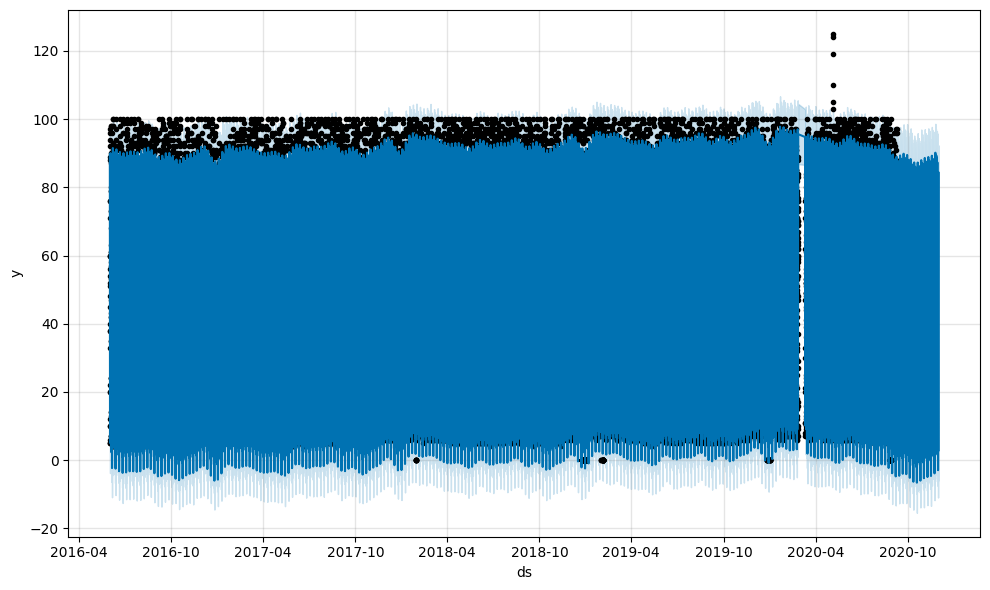

In [ ]:
# Plot the Prophet predictions for the Mercado trends data
fig = model.plot(forecast_mercado_trends)
fig.show()

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** Ther near-term forecast for the popularity of MercadoLibre does not look good.

#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [ ]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends.set_index('ds', inplace=True)

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_selected = forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]
forecast_selected.head()


,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,81.424322,97.931499
2016-06-01 01:00:00,86.075935,77.678510,94.499807
2016-06-01 02:00:00,75.753361,66.818698,84.523000
2016-06-01 03:00:00,60.487045,52.204968,69.302844
2016-06-01 04:00:00,43.373051,35.679448,52.096776


                          yhat  yhat_lower  yhat_upper
ds                                                    
2016-06-01 00:00:00  89.629222   81.424322   97.931499
2016-06-01 01:00:00  86.075935   77.678510   94.499807
2016-06-01 02:00:00  75.753361   66.818698   84.523000
2016-06-01 03:00:00  60.487045   52.204968   69.302844
2016-06-01 04:00:00  43.373051   35.679448   52.096776


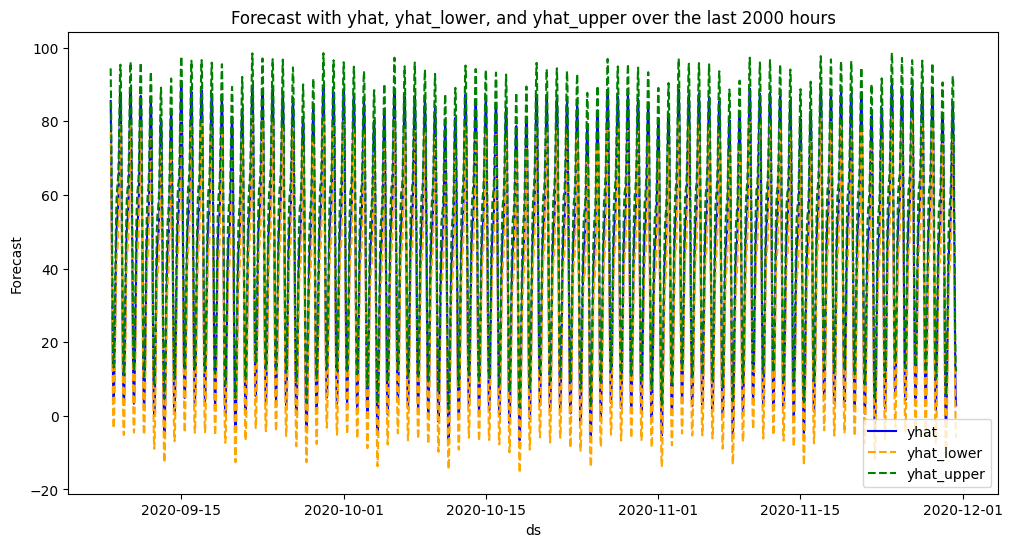

In [ ]:
#From the forecast_mercado_trends DataFrame, plot the data to visualize
#the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours

# Check if the DataFrame has an existing datetime index
if not pd.api.types.is_datetime64_any_dtype(forecast_mercado_trends.index):
    print("No datetime index found. Please provide the correct datetime column or index.")

# If we already have a datetime index or it was not provided, we can proceed
# Assuming the datetime column was 'ds' and it was renamed or not provided,
# You should provide the correct column name here if you know it.
# For example, if the datetime information was in a column named 'date', we would use 'date'.
else:
    # Select the yhat, yhat_lower, and yhat_upper columns
    forecast_selected = forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]

    # Display the first few rows of the selected columns
    print(forecast_selected.head())

    # Proceed with plotting the data over the last 2000 hours
    forecast_last_2000_hours = forecast_selected.tail(2000)

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(forecast_last_2000_hours.index, forecast_last_2000_hours['yhat'], label='yhat', color='blue')
    plt.plot(forecast_last_2000_hours.index, forecast_last_2000_hours['yhat_lower'], label='yhat_lower', color='orange', linestyle='--')
    plt.plot(forecast_last_2000_hours.index, forecast_last_2000_hours['yhat_upper'], label='yhat_upper', color='green', linestyle='--')

    # Add labels and title
    plt.xlabel('ds')
    plt.ylabel('Forecast')
    plt.title('Forecast with yhat, yhat_lower, and yhat_upper over the last 2000 hours')
    plt.legend(loc='lower right')
    plt.show()



DEBUG:cmdstanpy:input tempfile: /tmp/tmpuq6qlfdw/e7c3ywga.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuq6qlfdw/86tioeif.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6496', 'data', 'file=/tmp/tmpuq6qlfdw/e7c3ywga.json', 'init=/tmp/tmpuq6qlfdw/86tioeif.json', 'output', 'file=/tmp/tmpuq6qlfdw/prophet_modellmocq7g9/prophet_model-20240715144357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:43:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


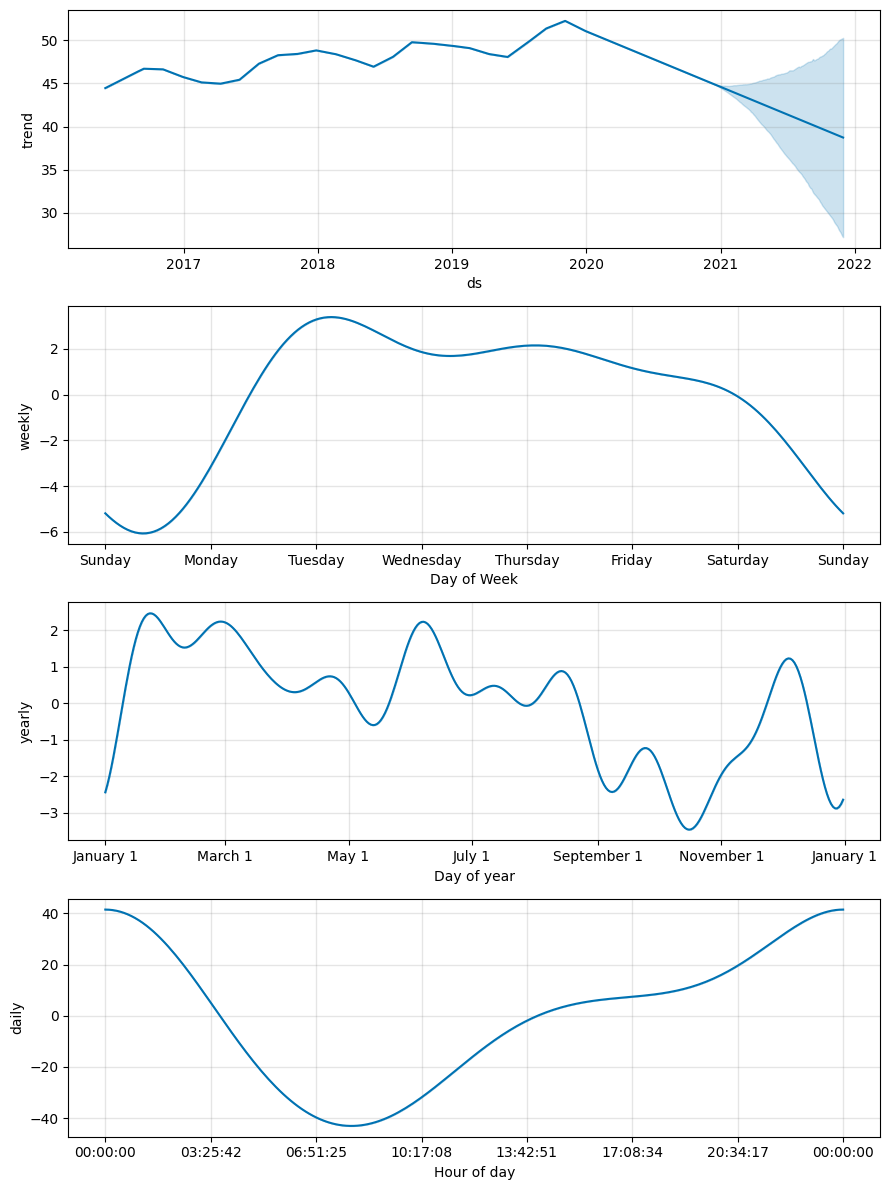

In [ ]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends.reset_index(inplace=True)

# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
# Prepare the DataFrame for Prophet
prophet1_df = forecast_mercado_trends[['ds', 'yhat']].rename(columns={'yhat': 'y'})

# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(prophet1_df)

# Create future DataFrame for forecasting
future_canada = model.make_future_dataframe(periods=365)  # Example: forecasting for 365 days

# Predict future values
forecast_canada = model.predict(future_canada)

# Plot forecast components
fig = model.plot_components(forecast_canada)
plt.tight_layout()
plt.show()







Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** Midnight -12:00 am

**Question:** Which day of week gets the most search traffic?
   
**Answer:** Tuesday is the most popular

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**October right before November 1st
